### Import Necessary Libraries


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

### Preprocess The Training Data

In [3]:
training_path = os.listdir("Fruits_Vegetables/train")
print(training_path)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [4]:
X = []
Y = []
Z = []

In [ ]:
for i, f in enumerate(training_path):
    images = os.listdir(f"Fruits_Vegetables/train/{f}")
    for image in images:
        img = cv2.imread(f"Fruits_Vegetables/train/{f}/{image}")
        if img is not None:
            img = cv2.resize(img, (128, 128))
            X.append(img)
            Y.append(i)
            Z.append(f)

In [6]:
X_np = np.array(X)/255
Y_np = np.array(Y)

In [7]:
print(X_np.shape)
print(Y_np.shape)

(3114, 128, 128, 3)
(3114,)


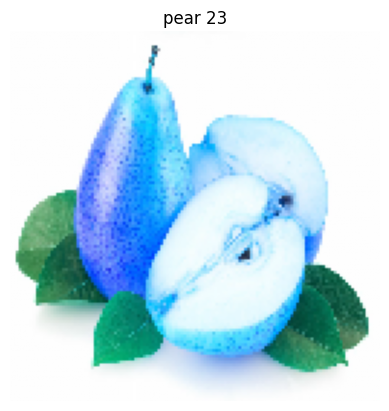

In [8]:
plt.imshow(X_np[2000])
plt.title(f"{Z[2000]} {Y[2000]}")
plt.axis(False)
plt.show()

### Making Model

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(),
    
    Flatten(),
    
    Dropout(0.2),
    
    Dense(128, activation="relu"),
    Dense(36, activation="softmax")
])

c:\Users\Abdullah Tariq\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

### Training Model

In [ ]:
history = model.fit(X_np, Y_np, epochs=15)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 199ms/step - accuracy: 0.0627 - loss: 3.4820
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.2314 - loss: 2.6172
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.3765 - loss: 2.1208
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.4867 - loss: 1.7062
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.5855 - loss: 1.3275
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.6968 - loss: 1.0576
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.8090 - loss: 0.6280
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.8934 - loss: 0.4090
Epoch 9/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.9426 - loss: 0.2410
Epoch 10/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 219ms/step - accuracy: 0.9485 - loss: 0.1986
Epoch 11/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 187ms/step - accuracy: 0.9732 - loss: 0.1197
Epoch 12/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 18

### Preprocess The Testing Data

In [12]:
x_test = []
y_test = []
z_test = []

In [13]:
testing_path = os.listdir("Fruits_Vegetables/test")

In [14]:
for i, f in enumerate(testing_path):
    images = os.listdir(f"Fruits_Vegetables/test/{f}")
    for image in images:
        img = cv2.imread(f"Fruits_Vegetables/test/{f}/{image}")
        if img is not None:
            img = cv2.resize(img, (128, 128))
            x_test.append(img)
            y_test.append(i)
            z_test.append(f)

In [15]:
x_test_np = np.array(x_test)/255
y_test_np = np.array(y_test)

### Evaluate Model On Testing Data

In [ ]:
test_loss, test_acc = model.evaluate(x_test_np, y_test_np)
print(f"Accuracy : {test_acc*100}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9488 - loss: 0.3664


[0.27476832270622253, 0.961002767086029]

### Predict The Testing Data

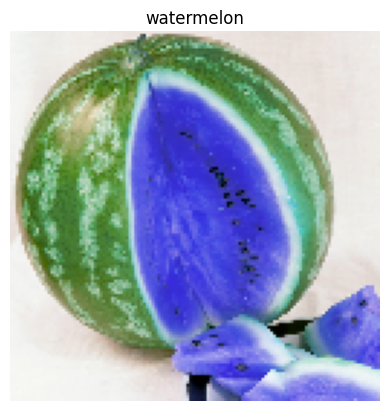

In [18]:
plt.imshow(x_test_np[358])
plt.title(z_test[358])
plt.axis(False)
plt.show()

In [19]:
y_pred = model.predict(x_test_np)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [20]:
training_path[np.argmax(y_pred[358])]

'watermelon'

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633,988 (6.23 MB)

 Trainable params: 1,633,988 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

### Save The Model

In [21]:
model.save("Fruits_Vegetables_model_96.10.h5")